In [ ]:
import numpy as np
np.random.seed(42)

# Matrix A
A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])

# Vector y
y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

# Normal Equation: θ = (A^T A)^(-1) A^T y
ATA = A.T @ A
ATA_inv = np.linalg.inv(ATA)
ATy = A.T @ y
theta = ATA_inv @ ATy

print("Theta (θ) from Normal Equation:")
print(theta)


Theta (θ) from Normal Equation:
[[-1.04137931]
 [ 2.03103448]]


In [ ]:
import numpy as np

# Data
A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])
y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

m = len(y)
theta = np.zeros((2,1))  # initialize θ = 0
learning_rate = 0.01
n_iterations = 1000

# Batch Gradient Descent
for i in range(n_iterations):
    gradient = (1/m) * (A.T @ (A @ theta - y))
    theta = theta - learning_rate * gradient

print("Theta (θ) after Batch Gradient Descent:")
print(theta)


Theta (θ) after Batch Gradient Descent:
[[-0.55217831]
 [ 1.9146829 ]]


In [ ]:
import numpy as np

# Data
A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])
y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

# SVD decomposition
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Compute pseudoinverse of S
S_plus = np.diag(1/S)

# Compute pseudoinverse of A
A_plus = VT.T @ S_plus @ U.T

# Compute θ
theta_svd = A_plus @ y

print("Theta (θ) from SVD pseudoinverse:")
print(theta_svd)


Theta (θ) from SVD pseudoinverse:
[[-1.04137931]
 [ 2.03103448]]


In [ ]:
import numpy as np

m = len(y)
noise = np.random.rand(m, 1) * 0.0001  # very small noise
A_collinear = np.hstack((A, A[:, [1]] + noise))  # add almost identical column

try:
    theta_normal_collinear = np.linalg.inv(A_collinear.T @ A_collinear) @ (A_collinear.T @ y)
    print("Theta from Normal Equation (collinear A):")
    print(theta_normal_collinear)
except np.linalg.LinAlgError:
    print("Normal Equation failed: Matrix is singular or ill-conditioned")

U, S, VT = np.linalg.svd(A_collinear, full_matrices=False)
S_plus = np.diag(1/S)
A_plus_collinear = VT.T @ S_plus @ U.T
theta_svd_collinear = A_plus_collinear @ y

print("Theta from SVD pseudoinverse (collinear A):")
print(theta_svd_collinear)



Theta from Normal Equation (collinear A):
[[-1.08064928e+00]
 [ 1.33069131e+03]
 [-1.32863885e+03]]
Theta from SVD pseudoinverse (collinear A):
[[-1.08067590e+00]
 [ 1.33069882e+03]
 [-1.32864636e+03]]


In [ ]:
import pandas as pd

# URL for Auto MPG dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Column names
column_names = [
    'MPG', 'Cylinders', 'Displacement', 'Horsepower',
    'Weight', 'Acceleration', 'ModelYear', 'Origin', 'CarName'
]

# Load dataset, replace '?' with NaN, and handle whitespace-delimited format
data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)

# Drop rows where 'Horsepower' is missing
data_mpg = data_mpg.dropna(subset=['Horsepower'])

# Convert 'Horsepower' to float
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

# Quick check
print("First 5 rows of cleaned data:")
print(data_mpg.head())


/tmp/ipython-input-2649991813.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)


First 5 rows of cleaned data:
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   Origin                    CarName  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Target vector y = MPG
y = data_mpg['MPG'].values.reshape(-1, 1)

# Feature matrix A = [1, Horsepower] (with intercept term)
A = np.hstack((np.ones((len(y), 1)), data_mpg['Horsepower'].values.reshape(-1, 1)))

# Normalize columns of A (except the intercept)
scaler = StandardScaler()
A[:, 1:] = scaler.fit_transform(A[:, 1:])

# Quick check
print("First 5 rows of normalized A:")
print(A[:5])
print("First 5 values of y:")
print(y[:5])


First 5 rows of normalized A:
[[1.         0.66413273]
 [1.         1.57459447]
 [1.         1.18439658]
 [1.         1.18439658]
 [1.         0.92426466]]
First 5 values of y:
[[18.]
 [15.]
 [18.]
 [16.]
 [17.]]


Theta from BGD: [[23.44490618]
 [-6.06761045]]
Theta from SGD: [[22.78916793]
 [-6.38060479]]


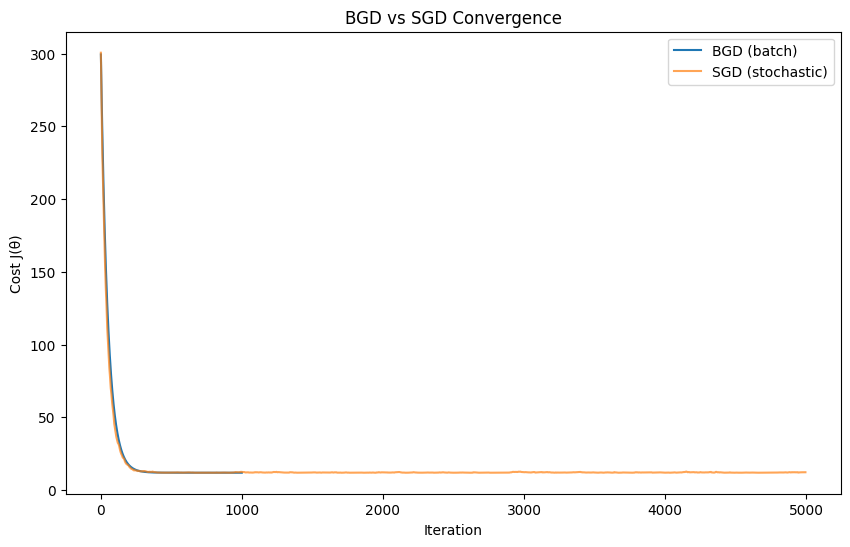

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.01
n_iterations_bgd = 1000
n_iterations_sgd = 5000

m = len(y)
theta_bgd = np.zeros((2,1))
theta_sgd = np.zeros((2,1))

# Store cost history
cost_bgd = []
cost_sgd = []

# --- Batch Gradient Descent (BGD) ---
for i in range(n_iterations_bgd):
    gradient = (1/m) * (A.T @ (A @ theta_bgd - y))
    theta_bgd = theta_bgd - learning_rate * gradient
    cost = (1/(2*m)) * np.sum((A @ theta_bgd - y)**2)
    cost_bgd.append(cost)

# --- Stochastic Gradient Descent (SGD) ---
for i in range(n_iterations_sgd):
    # Randomly select one sample
    idx = np.random.randint(0, m)
    Ai = A[idx:idx+1, :]  # 1x2
    yi = y[idx:idx+1]     # 1x1

    gradient = (Ai.T @ (Ai @ theta_sgd - yi))
    theta_sgd = theta_sgd - learning_rate * gradient

    # Compute full cost over all samples
    cost = (1/(2*m)) * np.sum((A @ theta_sgd - y)**2)
    cost_sgd.append(cost)

print("Theta from BGD:", theta_bgd)
print("Theta from SGD:", theta_sgd)

# --- Plot convergence ---
plt.figure(figsize=(10,6))
plt.plot(range(n_iterations_bgd), cost_bgd, label='BGD (batch)')
plt.plot(range(0, n_iterations_sgd, n_iterations_sgd//1000),
         [cost_sgd[i] for i in range(0, n_iterations_sgd, n_iterations_sgd//1000)],
         label='SGD (stochastic)', alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("BGD vs SGD Convergence")
plt.legend()
plt.show()


Theta (θ) for polynomial regression (degree 2):
[[ 23.64104322]
 [-11.65104422]
 [  5.84845562]]


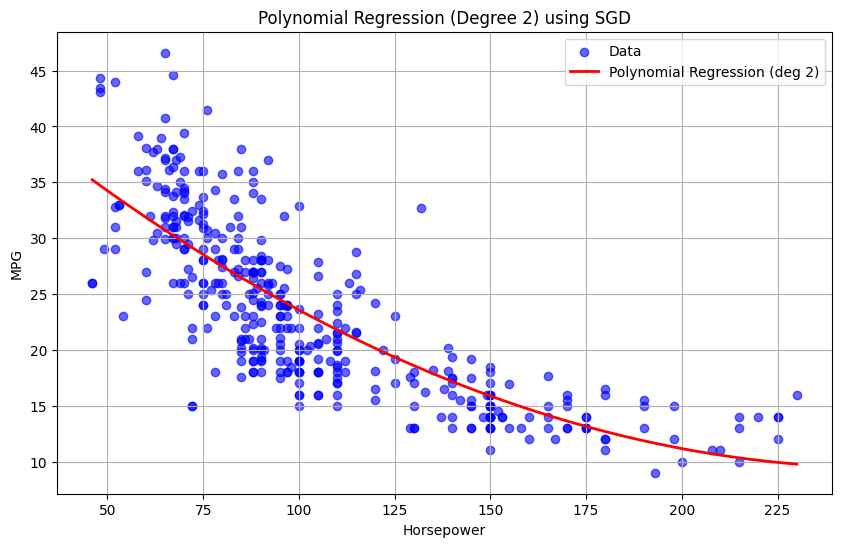

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Prepare polynomial design matrix ---
x = data_mpg['Horsepower'].values.reshape(-1, 1)
y = data_mpg['MPG'].values.reshape(-1, 1)

# Create polynomial features: [1, x, x^2]
X_poly = np.hstack((np.ones_like(x), x, x**2))

# Normalize columns except intercept
scaler = StandardScaler()
X_poly[:, 1:] = scaler.fit_transform(X_poly[:, 1:])

# --- SGD Parameters ---
learning_rate = 0.01
n_iterations = 5000
theta = np.zeros((3, 1))  # θ0, θ1, θ2
m = len(y)

# --- SGD Loop ---
for i in range(n_iterations):
    idx = np.random.randint(0, m)
    Xi = X_poly[idx:idx+1, :]  # 1x3
    yi = y[idx:idx+1]          # 1x1

    gradient = Xi.T @ (Xi @ theta - yi)
    theta = theta - learning_rate * gradient

print("Theta (θ) for polynomial regression (degree 2):")
print(theta)

# --- Plot regression curve ---
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Data')

# Generate smooth curve for plotting
x_curve = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
X_curve_poly = np.hstack((np.ones_like(x_curve), x_curve, x_curve**2))
X_curve_poly[:, 1:] = scaler.transform(X_curve_poly[:, 1:])  # normalize

y_curve = X_curve_poly @ theta
plt.plot(x_curve, y_curve, color='red', linewidth=2, label='Polynomial Regression (deg 2)')

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression (Degree 2) using SGD")
plt.legend()
plt.grid(True)
plt.show()
